Copyright (c) 2015, 2016
[Sebastian Raschka](http://sebastianraschka.com/)
[Li-Yi Wei](http://www.liyiwei.org/)

https://github.com/1iyiwei/pyml
<br>
[MIT License](https://github.com/1iyiwei/pyml/blob/master/LICENSE.txt)

# Introduction
* What is machine learning
* Why machine learning
* Types of machine learning
* Machine learning pipeline
* Relations to other fields
* Historical perspective

# What is machine learning?
The construction and study of algorithms/programs that can <b> learn from data </b>.

![](./images/ml-overview.jpg?raw=true)<!-- 
![](../images/ml-overview.jpg?raw=true)
-->


# Traditional programming

Steps: formulate problem $\rightarrow$ design algorithm $\rightarrow$ write program $\rightarrow$ test

The program remains invariant with different input data, unless the programmer manually changes it.


# Example: minimum finding
Problem
* Given a sequence of numbers, find the smallest one

Algorithm
* Record the currently minimum, initialized to $\infty$
* Loop through the numbers one by one
 * If this number $<$ minimum, minimum $\leftarrow$ this number
 
Analysis
* The time complexity of the above algorithm is $O(N)$ where $N$ is the sequence size.

In [1]:
# a simple python program to find minimum numbers
# note that it remains the same regardless of the input data

import math

# function
def findmin(numbers):
    answer = math.inf
    for value in numbers:
        if value < answer:
            answer = value
    return answer

# main
test = [3.14, 2.2, 8, -9.2, 100000, 0]

print(findmin(test))


-9.2


# Example: sorting

Problem
* Given a sequence of numbers, order them from small to large

Algorithm
* Pick one number (randomly) as anchor
* Go through each other number
 * If this number $\leq$ anchor, append it to the left sequence
 * Otherwise, append it to the right sequence
* Apply the same method recursively to the left and right sequences
* Concatenate left sequence, anchor, right sequence

In [2]:
# code is left as an exercise

# Other examples
Think about the programs you have written in the past; how many of them can learn from data?

# Machine learning

The program can learn from data and change structure/behavior

The programmer still writes (part of) the program, but it is not fixed
* Models with parameters that can change with input data, like brains
* Programmer selects and initializes the model; the model parameters change with data (training via optimization)
* The trained model deals with future situations

[<img src="https://www.wired.com/wp-content/uploads/2016/03/GW20160133774-1024x768.jpg">](http://www.wired.com/2016/03/final-game-alphago-lee-sedol-big-deal-humanity/)

# Why learning from data

Some algorithms/programs are hard/impossible to design/code manually/explicitly

The algorithms/programs might need to deal with unforseeable situations (generalization)





# Example: handwriting digit recognition

<a href="https://github.com/cazala/mnist/blob/master/README.md"><img src="https://camo.githubusercontent.com/d440ac2eee1cb3ea33340a2c5f6f15a0878e9275/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067"></a>

Problem
* Input: a digit represented by a $28 \times 28$ image (MNIST)
* Output: one of the digits in [0 .. 9]

Traditional programming?
* Give it a try :-)

Machine learning
* Collect data - pairs of images and labels
* Select and initialize a model; train the model (parameters) with the data
* The model, if properly trained, can recognize handwritings not in the original dataset for training

Sometimes it is much easier to say what (example data) instead of how (algorithm)
* [Soon We Won’t Program Computers. We’ll Train Them Like Dogs](http://www.wired.com/2016/05/the-end-of-code/)

# Other applications

* Self-driving cars
* Language translation
* Speech analysis & synthesis
* Spam filtering
* Recommendation systems
* Fraud detection
* Market prediction

# Types of machine learning

<img src="./images/01_01.png">

# Supervised learning

Given examples of inputs and corresponding desired outputs, predict outputs for future inputs
* classification, regression, time series prediction

<img src="./images/01_02.png">

# Classification vs. regression





## Classification: discrete output
Class labels: spam or not spam, positive or negative for disease, types of animals, etc.
<img src="./images/01_03.png">

## Classifying flowers based on various features
<img src="./images/01_08.png">

## Regression: continous output
function fitting

<img src="./images/01_04.png" width=50%>

# Unsupervised learning

Given only inputs (without desired output examples), automatically discover representations, features, structure, etc. 
* clustering, outlier detection, density estimation, dimensionality reduction

# Clustering

Put data samples into different groups

<img src="./images/01_06.png" width=50%>

# Dimensionality reduction

Project data from a higher dimensional space into a lower dimensional space
* compression, visualization

<img src="./images/01_07.png">

# Reinforcement learning

Given sequences of actions of an agent and feedbacks from an environment, learn to select action sequences in a way that maximises the expected reward

<img src="./images/01_05.png" width=50%>

* playing games
 * state: game board configuration
 * reward: expected winning chance
 
* self driving cars
 * state: position, direction, speed, sensors, etc.
 * reward: not hitting anything, remaining time for destination, fuel consumption, etc.

# Summary of types

Types of learning

* Supervised learning
 * Given sample inputs and outputs, learn how to predict outputs for future inputs

* Unsupervised learning
 * Given only sample inputs, learn to transform or organize them in some way

* Reinforcement learning
 * No direct inputs or outputs, learn best behavior from environment feedbacks (states, rewards)


 
Types of data
* Discrete/continuous $\times$ input/output
 * Applies to different types of learning above

* Discrete output
 * Classification for supervised learning
 * Clustering for unsupervised learning
 
* Continuous output
 * Regression for supervised learning
 * Dimensionality reduction for unsupervised learning

# Representation

## Model
We can represent the model as a function $f$, with a set of parameters $\Theta$.
<br>
Given a set of inputs $\mathbf{X}$, the model computes outcomes $\mathbf{Y}$.
$$\mathbf{Y} = f(\mathbf{X}, \Theta)$$

For example, in digit recognition, $\mathbf{X}$ and $\mathbf{Y}$ are the digit images and digit labels (0 to 9), respectively.

The parameters $\Theta$ consist of those optimized automatically and those manually picked by humans.
The latter are called <b>hyper</b>-parameters.

## Loss
Every machine learning task as a goal, which can be formalized as a loss function:
$$L(\mathbf{X}, \mathbf{T}, \mathbf{Y})$$
, where $\mathbf{T}$ is some form of target or auxiliary information, such as:
* labels for supervised classification
* number of clusters for unsupervised clustering
* environment for reinforcement learning

## Regularization
In addition to the objective, we often care about the simplicity of the model, for better efficiency and generalization (avoiding over-fitting).
The complexity of the model can be measured by another penalty function:
$$P(\Theta)$$
Some common penalty functions include number and/or magnitude of parameters.

## Objective
We can sum up both the loss and regularization terms as the total objective:
$$\Phi(\mathbf{X}, \mathbf{T}, \Theta) = L\left(\mathbf{X}, \mathbf{T}, \mathbf{Y}=f(\mathbf{X}, \Theta)\right) + P(\Theta)$$

During training, the goal is to optimize the parameters $\Theta$ with respect to the given training data $\mathbf{X}$ and $\mathbf{T}$:
$$argmin_\Theta \; \Phi(\mathbf{X}, \mathbf{T}, \Theta)$$
And hope the trained model with generalize well to future data. 

## Example: curve fitting

<img src="./images/01_04.png" width=50%>

Given a set of data points $\left(\mathbf{X}, \mathbf{Y}\right)$, fit a model curve to describe their relationship.

This is actually a regression problem, but we have all seen this in prior math/coding classes to serve as a good example for machine learning.

Recall $\mathbf{Y} = f(\mathbf{X}, \Theta)$ is our model.

For 2D linear curve fitting, the model is a straight line:
$y = w_1 x + w_0$, so the parameters $\Theta = \{w_0, w_1\}$.

The loss function is $L\left(\mathbf{X}, \mathbf{T}, \mathbf{Y}\right) = \sum_i \left( T^{(i)} - Y^{(i)}\right)^2 = \sum_i \left( T^{(i)} - w_1 X^{(i)} - w_0 \right)^2$.
<br>
($\mathbf{X}$ is a matrix/tensor, and each data sample is a row. We denote the ith sample/row as $\mathbf{X}^{(i)}$.)

For this simple example we don't care about regularization, thus $P(\Theta) = 0$.

The goal is to optimize $\Theta = \{w_0, w_1 \}$ with given $\left(\mathbf{X}, \mathbf{Y}\right)$ to minimize $L$.
For simple cases like this, we can directly optimize via calculus:
$$
\begin{align}
\frac{\partial L}{\partial w_0} & = 0 \\
\frac{\partial L}{\partial w_1} & = 0
\end{align}
$$

The math and coding will be left as an exercise.

# Steps for building a machine learning system

We will talk about individual steps for the rest of this course.

<img src="./images/01_09.png">

# Machine learning and other related fields

Data mining
* discovering (i.e. mining) useful information from large data sets

Pattern recognition
* originated from engineering, more on hand-crafted algorithms
* machine learning originated from computer science


Artificial intelligence
* machine learning is a subset
* traditional AI can be rule-based, deterministic
* machine learnign tends to be data-driven, probabilistic
 * statistics

Cognitive science
* reverse engineers the brain
* machine learning focuses on the forward process
 * understanding biology can help, but not the goal

# Deep learning

Deep learning $\subset$ neural networks $\subset$ machine learning

Algorithms existed since the 80's, but lacked sufficient computing power

Moore law enabled simple algorithms to process deep architecture and large data

<a href="http://www.macleans.ca/society/science/the-meaning-of-alphago-the-ai-program-that-beat-a-go-champ/">Geoffrey Hinton, the godfather of ‘deep learning’—which helped Google’s AlphaGo beat a grandmaster—on the past, present and future of AI</a>

# A DARPA Perspective on Artificial Intelligence 

https://youtu.be/-O01G3tSYpU


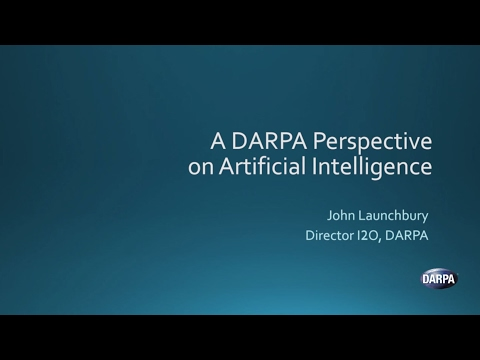

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("-O01G3tSYpU")

# Reading
* PML - Chapter 1
* IML - Chapter 1

# Coding
* Install anaconda, git
* Review/learn python, ipynb
* See [README.md](https://github.com/1iyiwei/pyml/blob/master/code/ch01/README.md) for quick instructions

# Assignment
* [ex01](http://nbviewer.jupyter.org/github/1iyiwei/pyml/blob/master/code/ch01/ex01.ipynb)

<center>
<h1>Fin</h1>
</center>